# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


[   29    30    35 ... 49941 49992 49994]
[    4     5    32 ... 49993 49998 49999]
[    6    13    18 ... 49987 49991 49995]
[    9    17    21 ... 49979 49982 49983]
[    3    10    20 ... 49981 49984 49990]
[   27    40    51 ... 49964 49980 49988]
[    0    19    22 ... 49962 49966 49996]
[    7    11    12 ... 49965 49978 49986]
[    8    62    69 ... 49968 49976 49985]
[    1     2    14 ... 49963 49971 49997]


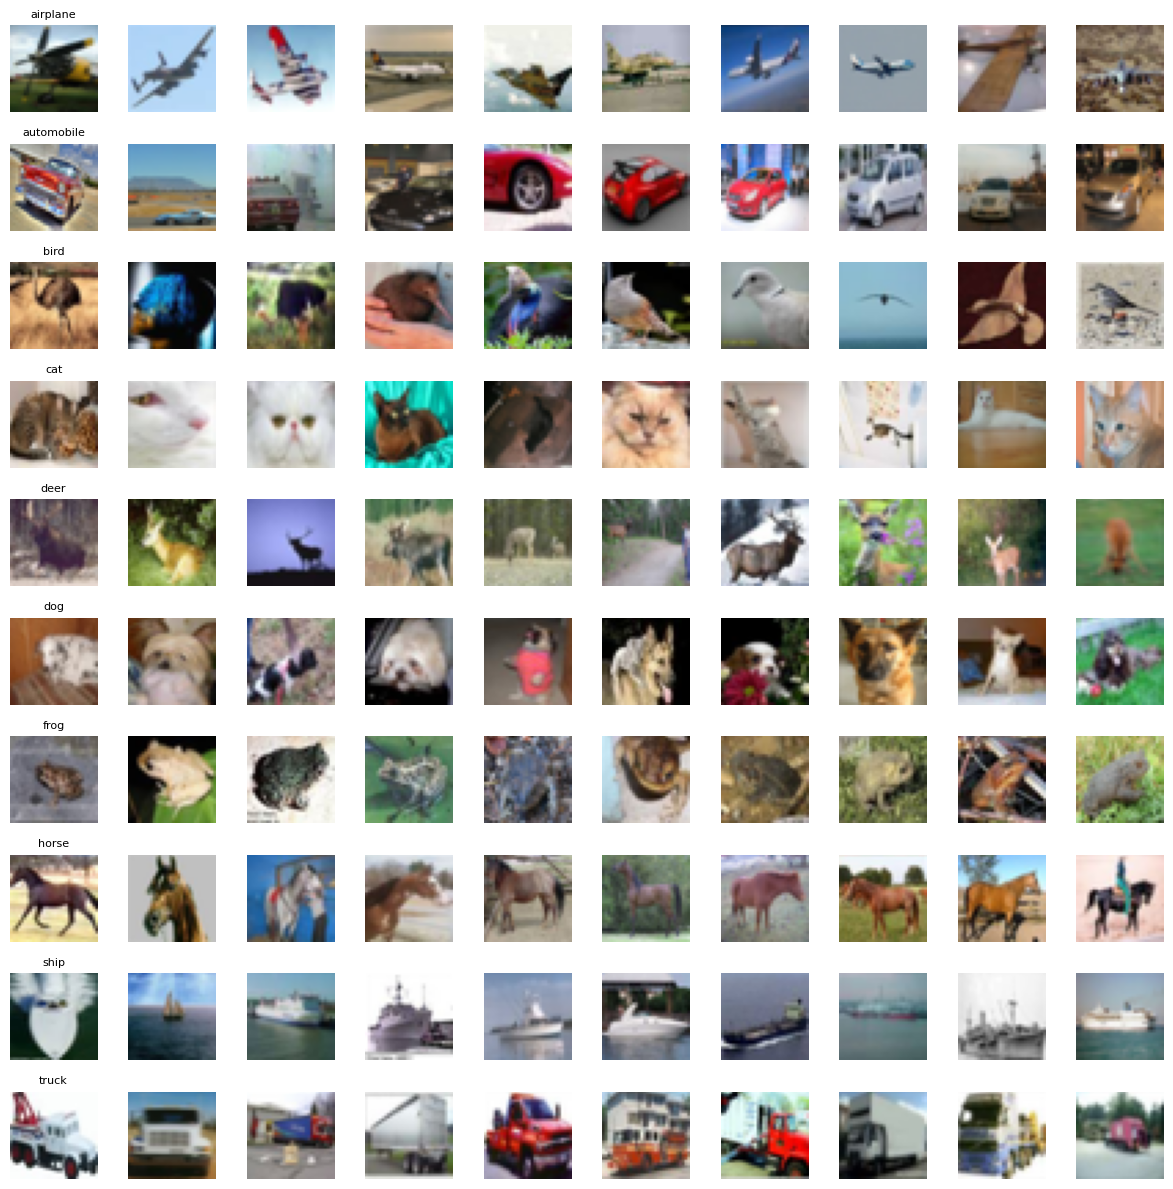

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
ytrain Shape: (50000, 1) and value: [6]
ytest Shape: (10000, 1) and value: [8]


In [2]:

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a 10x10 plot (10 images from each of the 10 classes)
plt.figure(figsize=(12, 12))
for class_idx in range(10):
    # Find indexes of all images of current class
    class_indices = np.where(y_train == class_idx)[0]
    print(class_indices)
    # Select 10 random images
    random_indices = np.random.choice(class_indices, 10, replace=False)

    for i, img_idx in enumerate(random_indices):
        plt_idx = class_idx * 10 + i + 1  # from 1 to 100
        plt.subplot(10, 10, plt_idx)
        plt.imshow(x_train[img_idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[class_idx], fontsize=8)

plt.tight_layout()
plt.show()

#before one-hot-encoding
print("ytrain Shape: %s and value: %s" % (y_train.shape, y_train))
print("ytest Shape: %s and value: %s" % (y_test.shape, y_test))

ytrain=to_categorical(y_train)
ytest=to_categorical(y_test)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (y_train.shape, y_train[0]))
print("ytest Shape: %s and value: %s" % (y_test.shape, y_test[1]))

# Normalize the image data to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session

clear_session()

In [4]:
# Your code here :
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    # Convolutional front-end
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps into a vector
    layers.Flatten(),

    # Fully connected (dense) layers
    layers.Dense(100, activation='relu'),         # Optional: increase model capacity
    layers.Dense(10, activation='softmax')       # 10 classes for CIFAR-10
])
model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

trained = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=2
)

Epoch 1/50
98/98 - 6s - 59ms/step - accuracy: 0.1801 - loss: 2.2356 - val_accuracy: 0.2315 - val_loss: 2.1568
Epoch 2/50
98/98 - 6s - 60ms/step - accuracy: 0.2625 - loss: 2.0928 - val_accuracy: 0.2718 - val_loss: 2.0401
Epoch 3/50
98/98 - 1s - 13ms/step - accuracy: 0.3031 - loss: 1.9918 - val_accuracy: 0.3104 - val_loss: 1.9607
Epoch 4/50
98/98 - 1s - 12ms/step - accuracy: 0.3242 - loss: 1.9329 - val_accuracy: 0.3230 - val_loss: 1.9142
Epoch 5/50
98/98 - 1s - 14ms/step - accuracy: 0.3391 - loss: 1.8952 - val_accuracy: 0.3379 - val_loss: 1.8835
Epoch 6/50
98/98 - 1s - 10ms/step - accuracy: 0.3515 - loss: 1.8642 - val_accuracy: 0.3523 - val_loss: 1.8509
Epoch 7/50
98/98 - 1s - 13ms/step - accuracy: 0.3597 - loss: 1.8402 - val_accuracy: 0.3320 - val_loss: 1.8478
Epoch 8/50
98/98 - 1s - 11ms/step - accuracy: 0.3714 - loss: 1.8111 - val_accuracy: 0.3689 - val_loss: 1.7964
Epoch 9/50
98/98 - 1s - 15ms/step - accuracy: 0.3767 - loss: 1.7869 - val_accuracy: 0.3676 - val_loss: 1.7961
Epoch 10/5

*   Plot the cross entropy loss curve and the accuracy curve

> Add blockquote



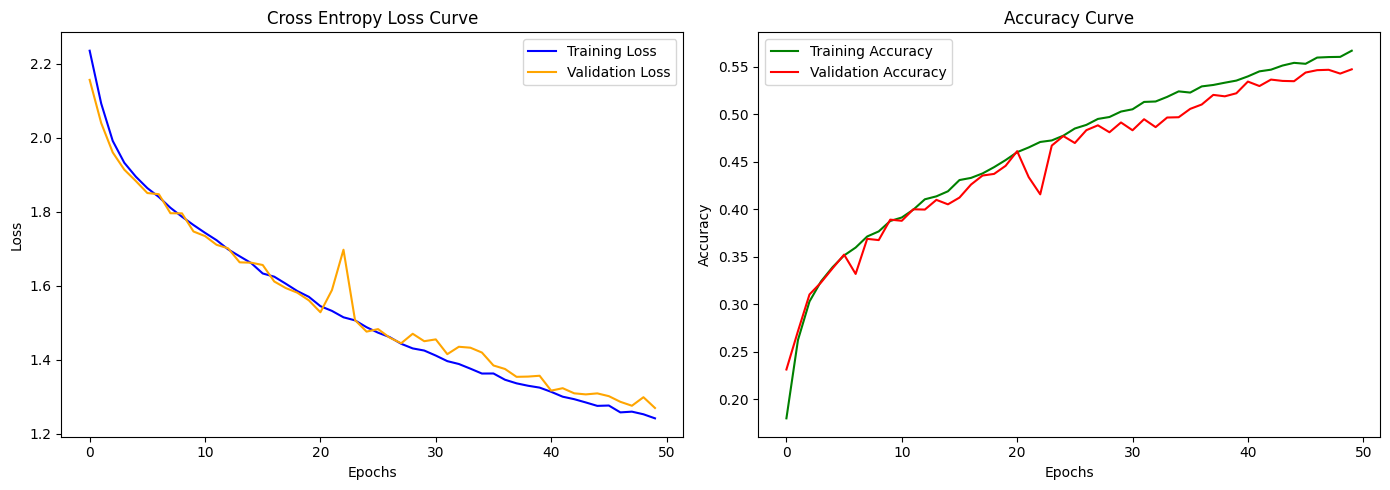

In [6]:

# Plot Cross-Entropy Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(trained.history['loss'], label='Training Loss', color='blue')
plt.plot(trained.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(trained.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(trained.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train_resized = tf.image.resize(x_train, (224, 224))
x_test_resized = tf.image.resize(x_test, (224, 224))

# Normalize pixel values
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

# Load pre-trained VGG16 without top
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base layers
for layer in vgg.layers:
    layer.trainable = False

# Add custom classifier
x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

# model = Model(inputs=vgg.input, outputs=output)
model = models.Sequential([
    # Convolutional front-end
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps into a vector
    layers.Flatten(),

    # Fully connected (dense) layers
    layers.Dense(128, activation='relu'),         # Optional: increase model capacity
    layers.Dense(10, activation='softmax')       # 10 classes for CIFAR-10
])
model.summary()


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


trained = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=2
)


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [ ]:
# Your code here :
# Plot Cross-Entropy Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(trained.history['loss'], label='Training Loss', color='blue')
plt.plot(trained.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(trained.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(trained.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Your code here :

from sklearn.metrics import r2_score

y_train_pred = trained.predict(X_train)
y_test_pred = trained.predict(X_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

print(f"R2 Score (train): {r2_score_train}, R2 Score (test): {r2_score_test}")

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
